In [1]:
import pandas as pd

tweet_data = pd.read_csv('processed_tweetData.csv')
tweet_data.head(5)

,username,timestamp,retweets,likes,is_retweet,text
0,Esthersumi,2019-08-17,126,42,0,한국인과 결혼해서 광고도 찍고 방송에도 나오다 홀연히 사라진 일본인.. 그 후 혐한...
1,chunnha,2019-08-17,1,0,0,일본군 둥닝요새의 ‘위안부 참상’ 중국 헤이룽장성의 관동군 주둔지에서 고초 겪은 ...
2,hyeong_chun,2019-08-17,0,1,0,이형춘(Hyeong Chun Lee): 노인과 권위의 나라 일본(Japan cou...
3,woori153,2019-08-17,1,2,0,일본 패망 할때까지 쭈우욱 가야죠. #노 재팬
4,LoveMoon012,2019-08-17,17,12,0,문재인 대통령의 방향성이 옳다는 것을 다시 한 번 확인하게 되네. No 아베로 그칠...


In [2]:
def find_keywords(text):
    boycott = text.find('불매운동')
    if boycott == -1:
        boycott = text.find('보이콧')
        if boycott == -1:
            boycott = text.find('boycott')
    if not boycott == -1:
        boycott = 1
    else:
        boycott = 0
    
    no = text.find('노')
    no_japan1 = 0
    if not no == -1:
        no_japan1 = text[no+1:].find("재팬")
        if no_japan1 == -1:
            no_japan1 = 0
    no_japan2 = text.find('no japan')
    if no_japan2 == -1:
        no_japan2 = 0
    
    no_japan = no_japan1 + no_japan2
    if no_japan > 1:
        no_japan = 1
    
    return pd.Series({'boycott': boycott, 'no_japan': no_japan})

In [3]:
tweet_data = pd.concat([tweet_data, tweet_data['text'].apply(find_keywords)], axis=1)
tweet_data = tweet_data.sort_values(['timestamp'])
tweet_data.head(5)

,username,timestamp,retweets,likes,is_retweet,text,boycott,no_japan
10714,MMsikabanek,2019-06-01,0,1,0,부산 사람이라 배타고 후쿠오카 가는 일이 잦아서... 항공사 외에 훼리랑 쾌속선쪽 ...,0,0
87019,hi_romi974,2019-06-01,0,3,0,저 이거 후쿠오카 가면서 비행기 창 밖 찍은건데 이 구름 시나모롤 닮았죠!!? p...,0,0
10853,cos_elim,2019-06-01,0,0,0,아아 캐논 하이엔드에요~~,0,0
10852,mani_mani_99,2019-06-01,0,2,0,후쿠오카 텐진 파르코 백화점 본관 7층에서 우타프리 시크릿ㅡ가든 파티 하는중 pic...,0,0
10851,fender62r,2019-06-01,0,0,0,이제 펜탁스같은 계열 쓰셔야죠 무슨 니콘캐논ㅇㅈㄹㅋㅋㅋ,0,0


In [4]:
tweet_data.to_csv('frequency_tweet_data.csv')

In [1]:
import pandas as pd
tweet_data = pd.read_csv('frequency_tweet_data.csv')

In [2]:
timestamp = list(set(tweet_data['timestamp'].values))
timestamp.sort()
group_sum = tweet_data.groupby('timestamp').sum()
frequency = pd.DataFrame()
frequency['timestamp'] = timestamp
frequency['boycott'] = group_sum['boycott'].values
frequency['no_japan'] = group_sum['no_japan'].values
frequency['timestamp'] = frequency['timestamp'].apply(lambda time: time[6]+'/'+time[8:])
frequency.head(5)

,timestamp,boycott,no_japan
0,6/01,0,0
1,6/02,2,0
2,6/03,3,1
3,6/04,1,0
4,6/05,3,0


In [16]:
times = ['7/01', '7/03', '7/04', '7/05', '7/15', '7/17', '7/24', '7/30', '8/15']
events = ['수출 제한 발표', '불매운동사이트 확산', '수출절차 변경', '중소상인 동참선언', 
          '수퍼마켓조합 동참선언', '일본여행 카페 휴면', '택배노조 동참선언',
          '지방정부 공동선언', '광복절']
indexs = []
for time in times:
    indexs.append(frequency[frequency.timestamp == time].index[0])

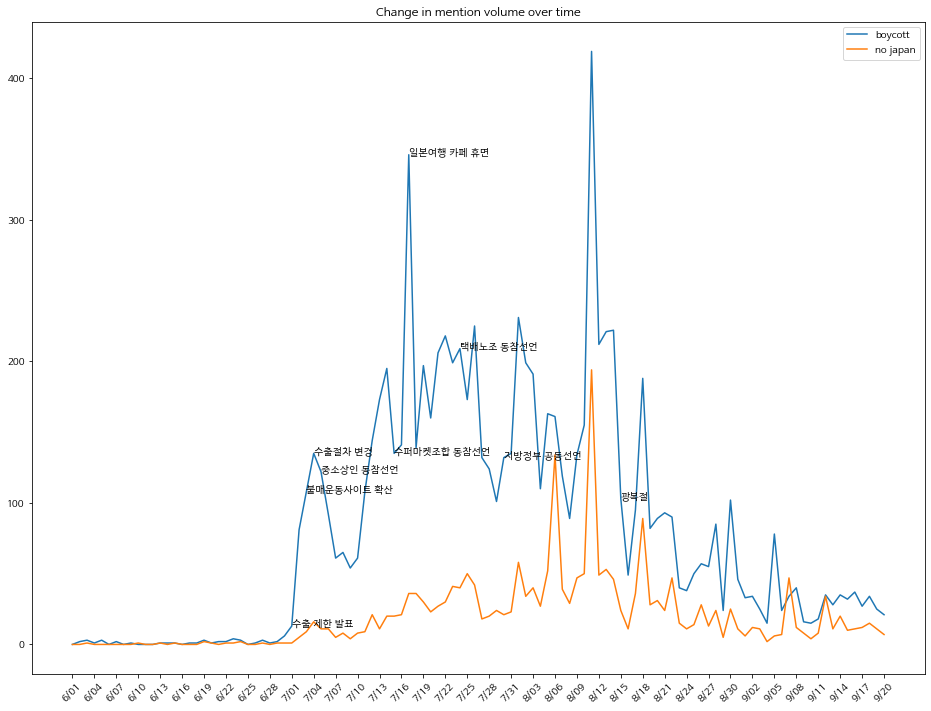

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(16,12))
ax = plt.subplot(1,1,1)
plt.title('Change in mention volume over time')
plt.plot(frequency['timestamp'].values, frequency['boycott'].values, label='boycott')
plt.plot(frequency['timestamp'].values, frequency['no_japan'].values, label='no japan')
for time, event, index in zip(times, events, indexs):
    height = frequency['boycott'].values[index]
    if height < frequency['no_japan'].values[index]:
        height = frequency['no_japan'].values[index]
    plt.text(time, height, event)
ax.set_xticks(frequency['timestamp'][::3])
ax.set_xticklabels(frequency['timestamp'][::3], rotation=45)
plt.legend()

약간 예상한 것과 다르게 결과가 나왔다. 광복절을 전후로 최고치를 찍을 것이라 예상했던 것과 달리 다른 날에 최고점을 찍고 있어 해당 날짜에 무슨 사건이 발생했는지 알아보았다.

In [22]:
frequency[frequency.boycott == frequency.boycott.max()]

,timestamp,boycott,no_japan
71,8/11,419,194


**8월 11일 주요 뉴스 목록**

+ 한국콜마 회장 전격 사퇴 - 불매운동 직격탄
+ DHC '혐한방송' 논란 - 한국 역사까지 왜곡
+ 북, 한미훈련 '막말 비난' - 트럼프엔 사과

위 뉴스 내용으로 보아 일본의 막말 등으로 인해 국민들의 관심이 더욱 높아졌다고 볼 수 있다.